### 배경설명

- 광고 회사에서 각 고객의 인적 사항, 특정 프로모션의 수용 여부에 대한 데이터 제공
- 해당 데이터를 토대로 컨설팅을 받고자 함


### 주요 목표

- 프로모션을 통한 수익을 극대화하기 위해 어떤 고객층을 타겟으로 해야하는가? 에 대한 해답을 제시
- 머신러닝 모델 구축을 통해 프로모션 비용, 이익을 바탕으로 한 기대수익 도출 


### 핵심 질문

- 제공된 데이터는 신뢰할 수 있는가?
- 프로모션을 받아들인 고객층과 아닌 고객층의 차이점과 공통점은?
- 수익을 극대화하기 위해 노려야할 주 타겟층은?
- 수익을 극대화하는 모델의 Precision과 Recall 값은?
- 어떤 모델과 파라미터들이 가장 큰 기대수익을 도출하는가?

### 데이터 사전

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise <br>
- Complain - 1 if customer complained in the last 2 years <br>
- DtCustomer - date of customer’s enrolment with the company <br>
- Education - customer’s level of education <br>
- Marital - customer’s marital status <br>
- Kidhome - number of small children in customer’s household <br>
- Teenhome - number of teenagers in customer’s household <br>
- Income - customer’s yearly household income <br>
- MntFishProducts - amount spent on fish products in the last 2 years <br>
- MntMeatProducts - amount spent on meat products in the last 2 years <br>
- MntFruits - amount spent on fruits products in the last 2 years <br>
- MntSweetProducts - amount spent on sweet products in the last 2 years <br>
- MntWines - amount spent on wine products in the last 2 years <br>
- MntGoldProds - amount spent on gold products in the last 2 years <br>
- NumDealsPurchases - number of purchases made with discount <br>
- NumCatalogPurchases - number of purchases made using catalogue <br>
- NumStorePurchases - number of purchases made directly in stores <br> 
- NumWebPurchases - number of purchases made through company’s web site <br>
- NumWebVisitsMonth - number of visits to company’s web site in the last month <br>
- Recency - number of days since the last purchase <br>



### 분석 과정 요약

- 제공된 데이터 중 신뢰성이 떨어지는 데이터는 제거하였습니다
- Income 데이터가 공백인 경우, GBR 모델을 활용하여 Impute 하였습니다
- XGB, CatBoost, LinearRegression 모델을 활용하여 기대수익을 도출하였습니다
- 프로모션 비용은 2달러, 프로모션이 성공했을 경우의 수익은 20달러로 가정하였습니다 

### 분석 결과 요약

- Precision 값이 0.22, Recall 값이 0.89일 때 Test Group에 대한 기대수익이 가장 컸습니다
- XGradientBoosting 모델을 사용하였을 때 가장 큰 기대수익을 도출하였습니다
- 프로모션의 주 타겟층은 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from IPython.display import display
import plotly.io as pio
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder

In [69]:
df = pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv', sep = ';', )

In [70]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Step 1. 전처리

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [72]:
df['ID'].duplicated().sum()
df1 = df.drop(columns = ['ID'])

duplicates = df1[df1.duplicated(keep = False)]
duplicates_sorted = duplicates.sort_values(by= duplicates.columns.tolist())
duplicates_sorted

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
39,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,...,6,1,0,0,0,0,0,3,11,1
894,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,...,6,1,0,0,0,0,0,3,11,1
17,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
282,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
182,1946,Master,Married,66835.0,0,0,2013-09-28,21,620,26,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,1992,Graduation,Married,34935.0,0,0,2013-06-21,71,34,4,...,7,0,0,0,0,0,0,3,11,0
392,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,152,...,2,0,0,0,0,0,0,3,11,0
928,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,152,...,2,0,0,0,0,0,0,3,11,0
696,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,...,6,0,0,0,0,0,0,3,11,0


<span style="font-size: 20px;">ID를 제외한 모든 변수들이 같다면, 단순 중복이라고 생각하고 중복을 제거한다</span>  


In [73]:
df2 = df1.drop_duplicates()
df2[df2['Income'].isna()].head()
print(df2['Marital_Status'].unique())
print(df2['Education'].unique())

df2[df2['Marital_Status'] == 'Absurd']
df2['Education'] = df2['Education'].replace({'2n Cycle' : "Master"}) 
df3 = df2.drop(df2[df2['Marital_Status'] == 'Absurd'].index)
df4 = df3.drop(df2[df2['Income'].isna()].index)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


/tmp/ipykernel_24/1585973752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Education'] = df2['Education'].replace({'2n Cycle' : "Master"})


<span style = "font-size: 20px;">Absurd는 의미 없는 값일 가능성이 높다. Basic은 고등학교 교육 수준 이하, 2n Cycle은 유럽에서 쓰이는 석사학위 수준<br>
Absurd로 표기한 사람이 2명밖에 안되므로 삭제하도록 한다
<br>
2n Cycle과 Master는 같은 석사 학위이므로 Master로 합친다

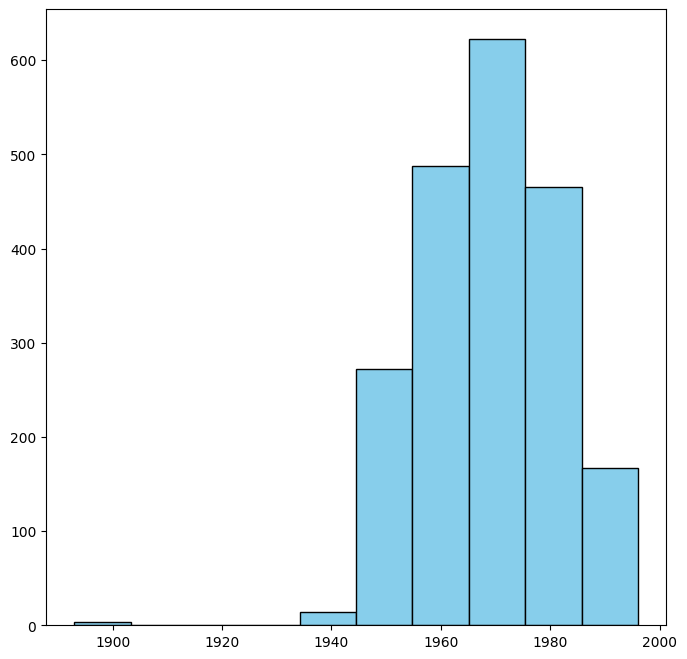

In [74]:
plt.figure(figsize = (8,8))
plt.hist(df4['Year_Birth'], edgecolor = 'black', color = 'skyblue')
plt.show()

In [75]:
df4[df4['Year_Birth'] < 1930]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,5,0,0,0,0,0,1,3,11,0
239,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,0,...,4,0,0,0,0,0,0,3,11,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,1,0,0,1,0,0,0,3,11,0


In [76]:
df4['Dt_Customer'] = pd.to_datetime(df4['Dt_Customer'])
df4['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

<span style = "font-size: 20px;">이 데이터는 2014년에 publish된 데이터인데, 1900년 이전에 출생했다는 것은 연세가 최소 114세 이상, 최대 121세이라는 뜻이다. 기네스북에 등재된 인간의 최대 수명이 122세임을 고려했을 때, 신뢰성이 부족하므로 삭제하도록 한다

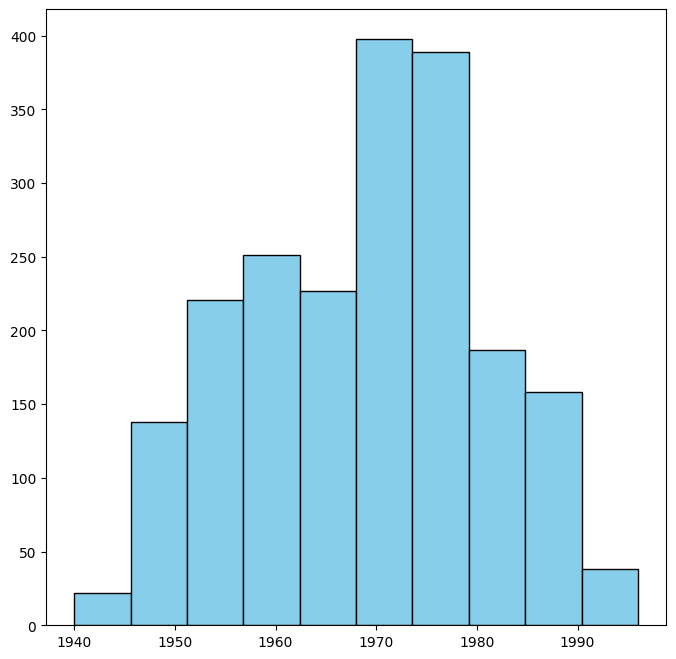

In [77]:
df5 = df4[df4['Year_Birth'] > 1930]
plt.figure(figsize = (8,8))
plt.hist(df5['Year_Birth'], edgecolor = 'black', color = 'skyblue' )
plt.show()

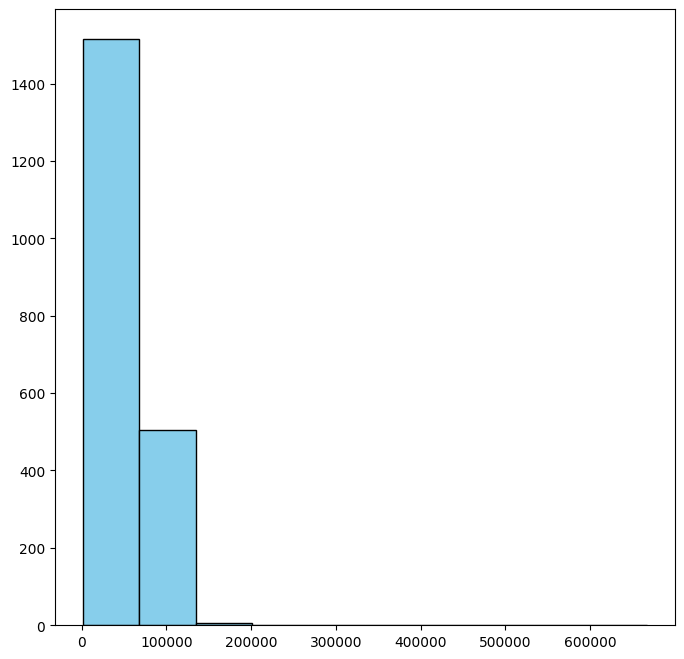

In [78]:
plt.figure(figsize = (8,8))
plt.hist(df5['Income'], edgecolor = 'black', color = 'skyblue' )
plt.show()

In [79]:
df5[df5['Income'] >180000]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,3,11,0


<span style = "font-size: 20px;">
한 데이터의 Income값은 66만달러로 다른 데이터에 비해 극단적인 값을 보인다 <br> <br>
1. 수익이 단순히 666666이라고 적힌 것이 데이터의 신뢰성을 떨어뜨린다 <br>
2. 해당 극단값이 하나밖에 존재하지않으므로, 해당 그룹으로부터 얻을 수 있는 인사이트가 없다 <br>
3. 해당 데이터로 인한 통계적 왜곡현상이 일어날 수 있다 <br> <br>

위 3가지 이유를 근거로, 삭제하도록 한다

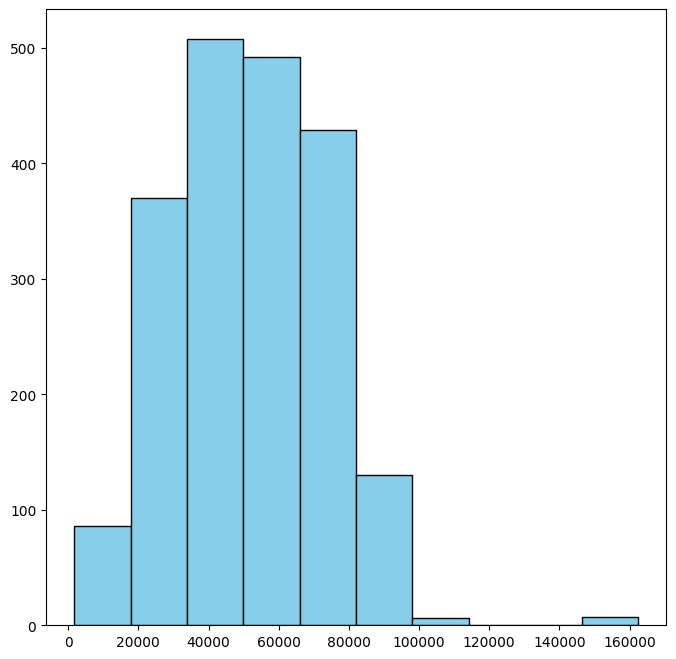

In [80]:
df6 = df5[df5['Income'] <180000]
plt.figure(figsize = (8,8) )
plt.hist(df6['Income'], edgecolor = 'black', color = 'skyblue')
plt.show()

In [81]:
df6['Z_Revenue'].unique()
df6['Z_CostContact'].unique()
df7 = df6.drop(columns = ['Z_Revenue', 'Z_CostContact'])

<span style = "font-size: 20px;"> Z_Revenue, Z_CostContact는 변수설명에 나와있지도 않고, 모두가 같은 값이다. 삭제하도록 한다

In [82]:
for col in df7.columns:
    if col in ['Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']:
        print(df7[col].unique())

[0 1 2]
[0 1 2]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [83]:
for col in df7.columns:
    if col in ['Dt_Customer', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
        print('{}, Min : {}, Max : {}'.format(col, df7[col].min(), df7[col].max()))


Dt_Customer, Min : 2012-07-30 00:00:00, Max : 2014-06-29 00:00:00
Recency, Min : 0, Max : 99
MntWines, Min : 0, Max : 1493
MntFruits, Min : 0, Max : 199
MntMeatProducts, Min : 0, Max : 1725
MntFishProducts, Min : 0, Max : 259
MntSweetProducts, Min : 0, Max : 262
MntGoldProds, Min : 0, Max : 321
NumDealsPurchases, Min : 0, Max : 15
NumWebPurchases, Min : 0, Max : 27
NumCatalogPurchases, Min : 0, Max : 28
NumStorePurchases, Min : 0, Max : 13
NumWebVisitsMonth, Min : 0, Max : 20


MntMeatProducts와 MntWines의 경우 Max 값이 조금 커 보인다. 자세히 확인해보자

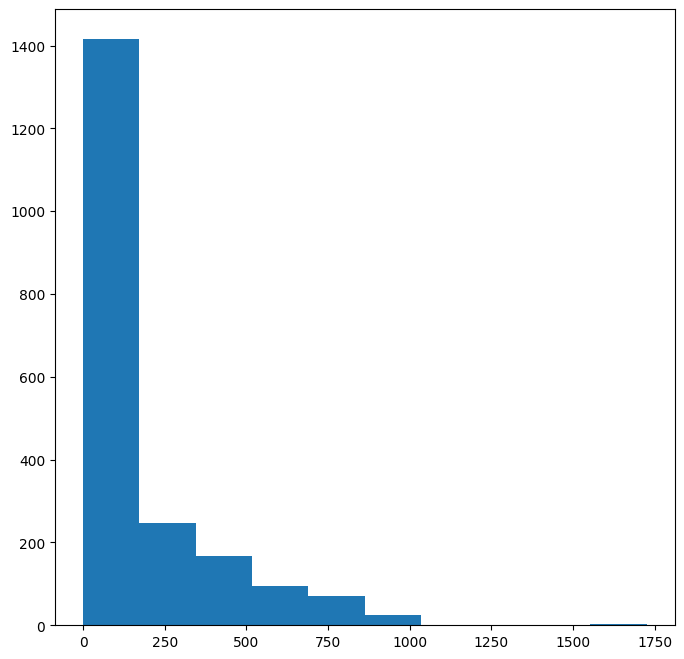

In [84]:
plt.figure(figsize = (8,8))
plt.hist(df7['MntMeatProducts'])
plt.show()

In [85]:
df7[df7['MntMeatProducts'] > 1000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
21,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,...,28,0,1,0,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,22,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,28,0,1,0,0,0,0,0,0,0


남들 보다 고기 소비량이 많은 가정이 4군데 있으나, 이상치로 규정하고 삭제하기엔 무리가 있어보여 삭제하지 않고 넘어가자

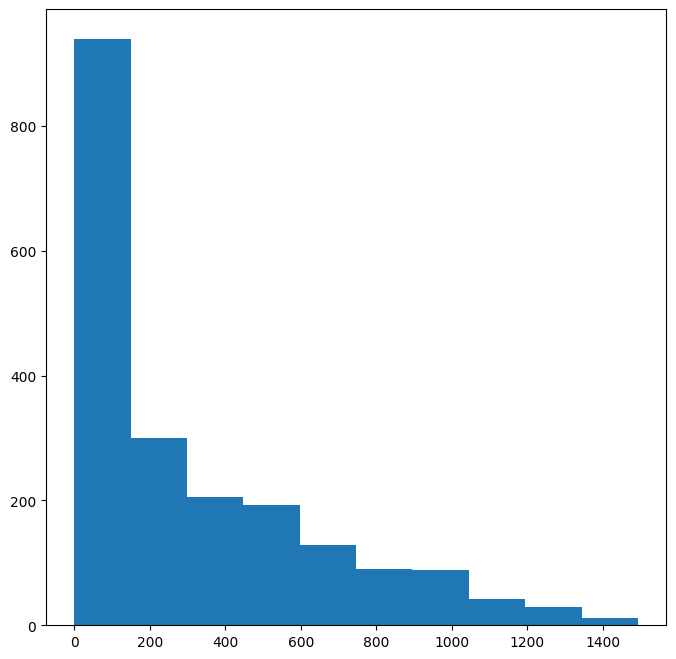

In [86]:

plt.figure(figsize = (8,8))
plt.hist(df7['MntWines'])
plt.show()

<span style = "font-size: 20px;"> Age 변수를 추가하되, 고객의 생일 데이터가 제공되지 않았으므로, 데이터가 생성된 년도 (2014년) - 출생년도로 나이를 계산한다

In [87]:
df7['Age'] = 2014 - df7['Year_Birth']
df8 = df7.drop(columns = 'Year_Birth')
df8.groupby('Marital_Status').size().reset_index(name = 'count')

,Marital_Status,count
0,Alone,3
1,Divorced,215
2,Married,788
3,Single,438
4,Together,512
5,Widow,70
6,YOLO,2


In [88]:
print(df8['Marital_Status'].unique())
df9 = df8[df8['Marital_Status'] != 'YOLO']
df9['Marital_Status'] = df9['Marital_Status'].replace({ 'Alone' : 'Single', 'Divorced' : 'Single', \
                                                       'Single' : 'Single', 'Widow' : 'Single', \
                                                      'Married' : 'Couple', 'Together' : 'Couple'})

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'YOLO']


/tmp/ipykernel_24/3121561078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Marital_Status'] = df9['Marital_Status'].replace({ 'Alone' : 'Single', 'Divorced' : 'Single', \


<span style = "font-size: 20px;"> 
YOLO는 현재 혼자 사는지, 배우자와 함께 하는지 알 수가 없으므로 데이터에서 제외. <br>
Alone과 Single은 같은 의미이므로 Single로 통합 <br>
Widow와 Divorced는 모두 배우자를 잃은 상태이므로 "Lost Spouse"로 통합

### Impute

- 24개의 데이터는 Income 값이 존재하지 않음
- XGB모델과 Feature Engineering을 통해 선택한 변수들을 토대로 해당 고객의 Income 값을 예측
- 예측한 값으로 Impute

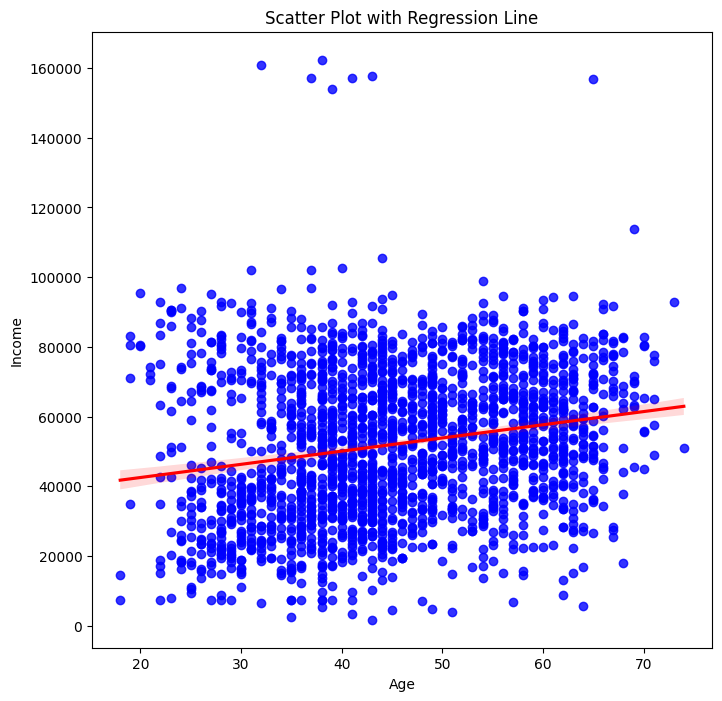

In [89]:
plt.figure(figsize=(8, 8))
sns.regplot(x = 'Age', y = 'Income', data = df9, scatter_kws = {'color' : 'blue'}, line_kws = {'color' : 'red'})
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot with Regression Line')
plt.show()

In [90]:
x = df9['Age']
y = df9['Income']

coefficients = np.polyfit(x, y, 1)
print('Slope : {}, Intercept : {}'.format(coefficients[0], coefficients[1]))


minmaxscaler  = MinMaxScaler()
standardscaler = StandardScaler()


x_normalized = minmaxscaler.fit_transform(df9[['Age']])
y_normalized = minmaxscaler.fit_transform(df9[['Income']])
lr_model = LinearRegression()

lr_model.fit(x_normalized, y_normalized)

slope = lr_model.coef_[0][0]
print(f'MinMaxScaled Slope : {slope}')


x_standard = standardscaler.fit_transform(df9[['Age']])
y_standard = standardscaler.fit_transform(df9[['Income']])
lr_model_2 = LinearRegression()
lr_model_2.fit(x_standard, y_standard)
print('Standardized Slope: {}'.format(lr_model_2.coef_[0][0]))

Slope : 378.38203383543515, Intercept : 34960.05390917211
MinMaxScaled Slope : 0.13188392074778474
Standardized Slope: 0.20425555513350369


In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, \
StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import plotly.express as px


In [92]:
bins = [0, 15000, 30000, 45000, 60000, 75000, 100000, 300000 ] 
labels = ['0-15k', '15k-30k', '30k-45k', '45k-60k', '60k-75k', '75k-100k','100k+']
df9['Income_Range'] = pd.cut(df9['Income'], bins = bins, labels = labels, right = False)
df_grouped = df9.groupby(['Income_Range', 'Education']).size().reset_index(name = 'Count')
df_grouped['Percent'] = df_grouped.groupby('Income_Range')['Count'].transform(lambda x : x/ x.sum())
df_grouped

/tmp/ipykernel_24/1498699646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Income_Range'] = pd.cut(df9['Income'], bins = bins, labels = labels, right = False)
/tmp/ipykernel_24/1498699646.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df9.groupby(['Income_Range', 'Education']).size().reset_index(name = 'Count')
/tmp/ipykernel_24/1498699646.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

,Income_Range,Education,Count,Percent
0,0-15k,Basic,11,0.215686
1,0-15k,Graduation,20,0.392157
2,0-15k,Master,15,0.294118
3,0-15k,PhD,5,0.098039
4,15k-30k,Basic,36,0.125874
5,15k-30k,Graduation,153,0.534965
6,15k-30k,Master,71,0.248252
7,15k-30k,PhD,26,0.090909
8,30k-45k,Basic,2,0.004158
9,30k-45k,Graduation,239,0.496881


In [94]:
df9

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Income_Range
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,57,45k-60k
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,60,45k-60k
2,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,49,60k-75k
3,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,30,15k-30k
4,PhD,Couple,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,33,45k-60k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,...,4,0,0,0,0,0,0,0,28,15k-30k
2235,Graduation,Couple,61223.0,0,1,2013-06-13,46,709,43,182,...,5,0,0,0,0,0,0,0,47,60k-75k
2237,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,0,33,45k-60k
2238,Master,Couple,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,0,58,60k-75k


In [95]:
bins = [18, 25, 33, 49, 65, 75]
labels = ['18-24', '25-32', '33-48', '49-64', '65+']

df9['Age_Group'] = pd.cut(df9['Age'], bins = bins, labels = labels, right  = False )


/tmp/ipykernel_24/2614168851.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor,\
GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor


df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

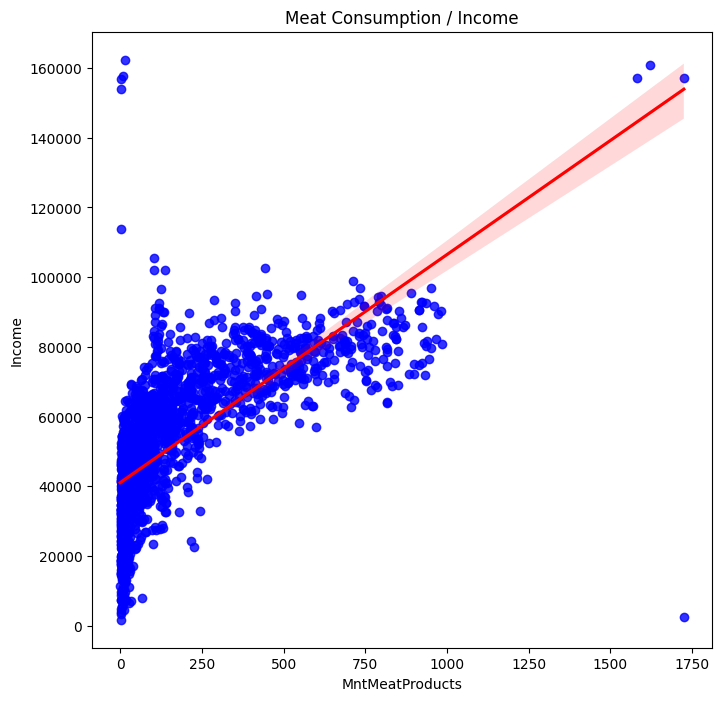

In [97]:
plt.figure(figsize = (8,8))
sns.regplot(
    x = 'MntMeatProducts',
    y= 'Income',
    data = df9,
    scatter_kws = {'color' : 'blue'},
    line_kws = {'color' : 'red'}
)
plt.title('Meat Consumption / Income')
plt.show()

In [98]:
lr = LinearRegression()
minmax_scaler = MinMaxScaler()
consumption_list = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts','MntGoldProds']
for col in consumption_list:
    x = minmax_scaler.fit_transform(df9[[col]])
    y = minmax_scaler.fit_transform(df9[['Income']])
    lr.fit(x, y)
    
    print('Var: {}, Coefficient : {}'.format(col, lr.coef_[0][0]))

Var: MntWines, Coefficient : 0.4039025992967528
Var: MntFruits, Coefficient : 0.338421782712651
Var: MntMeatProducts, Coefficient : 0.702657054999138
Var: MntFishProducts, Coefficient : 0.32866856871729444
Var: MntSweetProducts, Coefficient : 0.43963899459678885
Var: MntGoldProds, Coefficient : 0.3148625577730767


In [118]:
ind_list = ['Education', 'Marital_Status', 'Age','MntMeatProducts', 'Kidhome', 'Teenhome']
edu_list = ['Basic', 'Graduation', 'Master', 'PhD']
marital_list = ['Single', 'Couple']

ordinal_encoder = OrdinalEncoder(categories = [edu_list, marital_list] )
df_encoded = df9[['Age', 'MntMeatProducts', 'Kidhome', 'Teenhome', 'Income']]
df_encoded[['Education', 'Marital_Status']] = ordinal_encoder.fit_transform(df9[['Education', 
                                                                                 'Marital_Status']])

X = df_encoded.drop(columns = ['Income'])
y = df_encoded['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state =1)


/tmp/ipykernel_24/3028904178.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/3028904178.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
for i in range(2, 7):
        
    gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = i, random_state = 1)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'max_depth : {i}, R²: {r2:.2f}, RMSE: {rmse:.2f}')
print('-'*10)
for i in range(2, 7):
        
    gbr = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = i, random_state = 42)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'max_depth : {i}, R²: {r2:.2f}, RMSE: {rmse:.2f}')

max_depth : 2, R²: 0.74, RMSE: 10117.08
max_depth : 3, R²: 0.73, RMSE: 10325.01
max_depth : 4, R²: 0.69, RMSE: 10917.15
max_depth : 5, R²: 0.66, RMSE: 11523.86
max_depth : 6, R²: 0.67, RMSE: 11423.23
----------
max_depth : 2, R²: 0.74, RMSE: 10034.40
max_depth : 3, R²: 0.73, RMSE: 10234.08
max_depth : 4, R²: 0.72, RMSE: 10395.99
max_depth : 5, R²: 0.68, RMSE: 11164.21
max_depth : 6, R²: 0.66, RMSE: 11462.64


In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.05, 0.1],
    'max_depth' : [1,2,3]    
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state =1), param_grid, cv= 3, scoring = 'r2', verbose = 1  )
grid_search.fit(X_train, y_train)


gbr_df = pd.DataFrame(grid_search.cv_results_)




Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [130]:
gbr_df2= gbr_df.nlargest(3, 'mean_test_score')[['params', 'mean_test_score']]
gbr_df2

,params,mean_test_score
2,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",0.646407
3,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",0.633257
8,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.628098


In [ ]:
model = grid_search.best_estimator_
df_with_income = df9[df9['Income'].notna()]
df_missing = df9[df9['Income'].isna()]
X_missing = df_missing.drop(columns=['Income'])
X_missing_df = df_missing[['Age', 'MntMeatProducts', 'Kidhome', 'Teenhome', 'Income']]
predicted_income = model.predict(X_missing_df)
X_missing['Income'] = predicted_income
df9 = pd.concat([df_with_income, X_missing])